In [14]:
import numpy as np

from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

import matplotlib.pyplot as plt



In [15]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [16]:
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

In [17]:
train_dataset.data = train_dataset.data[(train_dataset.targets == 3) | (train_dataset.targets == 7)]
train_dataset.targets = train_dataset.targets[(train_dataset.targets == 3) | (train_dataset.targets == 7)]


In [18]:
test_dataset.data = test_dataset.data[(test_dataset.targets == 3) | (test_dataset.targets == 7)]
test_dataset.targets = test_dataset.targets[(test_dataset.targets == 3) | (test_dataset.targets == 7)]


In [19]:

train_dataset.targets = (train_dataset.targets == 7).long()
test_dataset.targets = (test_dataset.targets == 7).long()



In [20]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [21]:
X, y = next(iter(train_loader))
X = X.numpy()
y = y.numpy()

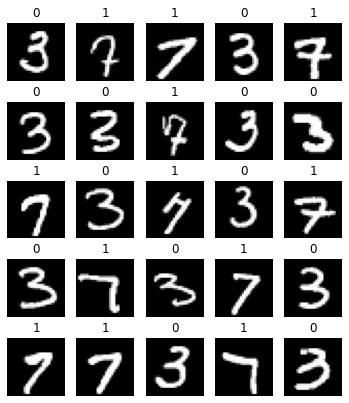

In [22]:
plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

In [23]:
learning_rate = 0.01
epochs = 10
inputFeatures = 784
innerLayerUnits = 100

In [24]:
losses = []
w1 = np.random.randn(innerLayerUnits, inputFeatures) * 0.01
b1 = np.zeros((innerLayerUnits, 1))
w2 = np.random.randn(1, innerLayerUnits) * 0.01
b2 = np.zeros((1, 1))


In [25]:

for n_epoch in range(epochs):
    
    print(f'Epoch: {n_epoch + 1}')
    tmpLosses = []
    for x, y in train_loader:
        
        x = x.view(x.shape[0], -1).numpy().T
        y = np.expand_dims(y.numpy(), 1).T

        #forward
        Z = np.dot(w1, x) + b1 #Linear 1
        A = np.maximum(0,Z) #Relu

        ZL = np.dot(w2, A) + b2  #Linear 2
        AL = 1/(1+np.exp(-ZL))   #Sigmoid

        #loss
        loss = -1/y.shape[1] * np.sum(np.multiply(np.log(AL),y) +  np.multiply(np.log(1-AL), (1-y)))
        tmpLosses.append(np.squeeze(loss))  

        #backward
        dAL = - (np.divide(y, AL) - np.divide(1 - y, 1 - AL))
  
        #Backward Sigmoid 
        dZ = dAL * AL * (1-AL)

        #Backward Linear 2
        dW2 = 1./A.shape[1] * np.dot(dZ, A.T)
        db2 = 1./A.shape[1] * np.sum(dZ, axis = 1, keepdims=True)
        dA = np.dot(w2.T, dZ)  

        #Backward Relu
        dZ = np.array(dA, copy=True)
        dZ[A <= 0] = 0

        #Backward Linear 1
        dW1 = 1./dA.shape[1] * np.dot(dZ, x.T)
        db1 = 1./dA.shape[1] * np.sum(dZ, axis = 1, keepdims=True)
        dA = np.dot(w1.T, dZ)  

        #update parameters
        w1 = w1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1
        w2 = w2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2

    losses.append(np.mean(tmpLosses))



Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10


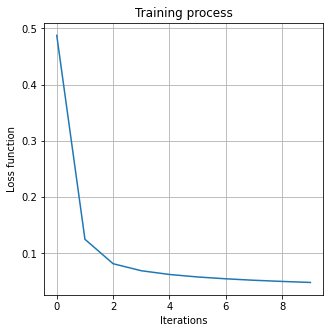

In [26]:

plt.figure(figsize=(5, 5))
plt.plot(losses)
plt.grid()
plt.title('Training process')
plt.xlabel('Iterations')
plt.ylabel('Loss function')
plt.show()